In [22]:
import pandas as pd
import numpy as np 


In [24]:
df = pd.read_csv('refined_data.csv')
df.head()

,Unnamed: 0,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,0,97194396,82eb67a6-f762-11e1-a439-00145eb45e9a,319d03ad-4a80-4e32-a39a-1530ac4c077c,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,...,NaN,NaN,CC_BY_4_0,NaN,Mick Mackey,NaN,NaN,2024-12-07T14:06:45.381Z,NaN,COUNTRY_COORDINATE_MISMATCH;TAXON_MATCH_TAXON_...
1,1,97194322,82eb67a6-f762-11e1-a439-00145eb45e9a,9732a1c0-ada9-463d-999a-4157d8025aac,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,...,NaN,NaN,CC_BY_4_0,NaN,Deborah Thiele,NaN,NaN,2024-12-07T14:06:44.975Z,NaN,TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED
2,2,97194162,82eb67a6-f762-11e1-a439-00145eb45e9a,5f5c48d2-aa32-40b9-b4c7-bd2bb5d44ade,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,...,NaN,NaN,CC_BY_4_0,NaN,Other,NaN,NaN,2024-12-07T14:06:45.180Z,NaN,TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED
3,3,97194160,82eb67a6-f762-11e1-a439-00145eb45e9a,0aaa31c5-c797-43a5-b374-76e6d58d95c9,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,...,NaN,NaN,CC_BY_4_0,NaN,Martin Field,NaN,NaN,2024-12-07T14:06:45.146Z,NaN,TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED
4,4,97194159,82eb67a6-f762-11e1-a439-00145eb45e9a,c96c99c2-8985-4d40-9403-56f31ec3ea75,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,...,NaN,NaN,CC_BY_4_0,NaN,Peter Gill,NaN,NaN,2024-12-07T14:06:45.140Z,NaN,TAXON_MATCH_TAXON_CONCEPT_ID_IGNORED


In [26]:
columns_to_drop = [
    'Unnamed: 0', 'gbifID', 'datasetKey', 'infraspecificEpithet', 'taxonRank',
    'scientificName', 'verbatimScientificName', 'verbatimScientificNameAuthorship',
    'countryCode', 'locality', 'stateProvince', 'occurrenceStatus', 'individualCount',
    'publishingOrgKey', 'coordinateUncertaintyInMeters', 'coordinatePrecision',
    'elevation', 'eventDate', 'taxonKey', 'speciesKey', 'basisOfRecord',
    'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
    'identifiedBy', 'dateIdentified', 'license', 'rightsHolder', 'recordedBy',
    'typeStatus', 'establishmentMeans', 'lastInterpreted', 'mediaType', 'issue'
]

# Drop columns
df = df.drop(columns=columns_to_drop, errors='ignore') 
df.head()

,occurrenceID,kingdom,phylum,class,order,family,genus,species,decimalLatitude,decimalLongitude,elevationAccuracy,depth,depthAccuracy,day,month,year
0,319d03ad-4a80-4e32-a39a-1530ac4c077c,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,Eubalaena australis,-48.03211,152.1251,NaN,0.0,0.0,29.0,3.0,1996.0
1,9732a1c0-ada9-463d-999a-4157d8025aac,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,Eubalaena australis,-62.83250,101.6271,NaN,0.0,0.0,12.0,2.0,1996.0
2,5f5c48d2-aa32-40b9-b4c7-bd2bb5d44ade,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,Eubalaena australis,-62.99000,116.2300,NaN,0.0,0.0,25.0,4.0,1998.0
3,0aaa31c5-c797-43a5-b374-76e6d58d95c9,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,Eubalaena australis,-63.01000,116.6700,NaN,0.0,0.0,25.0,4.0,1998.0
4,c96c99c2-8985-4d40-9403-56f31ec3ea75,Animalia,Chordata,Mammalia,Cetacea,Balaenidae,Eubalaena,Eubalaena australis,-63.01000,118.4900,NaN,0.0,0.0,25.0,4.0,1998.0


In [28]:
df.shape

(32336, 16)

Cluster Based on location, Time

In [30]:
print(df.isnull().sum())


occurrenceID          1111
kingdom                  0
phylum                   0
class                    0
order                    0
family                   0
genus                    0
species                 46
decimalLatitude        906
decimalLongitude       906
elevationAccuracy    30858
depth                31840
depthAccuracy        31840
day                   8761
month                 8492
year                  8218
dtype: int64


In [32]:
df = df.drop(columns=['elevationAccuracy', 'depth', 'depthAccuracy'], errors='ignore')


In [34]:
df = df.dropna(subset=['day', 'month', 'year'])


In [36]:
print(df.isnull().sum())


occurrenceID        1081
kingdom                0
phylum                 0
class                  0
order                  0
family                 0
genus                  0
species               14
decimalLatitude      227
decimalLongitude     227
day                    0
month                  0
year                   0
dtype: int64


In [38]:
df = df.dropna(subset=['decimalLatitude', 'decimalLongitude'])


Elbow method !!

/Users/shreyashtiwari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shreyashtiwari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shreyashtiwari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shreyashtiwari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

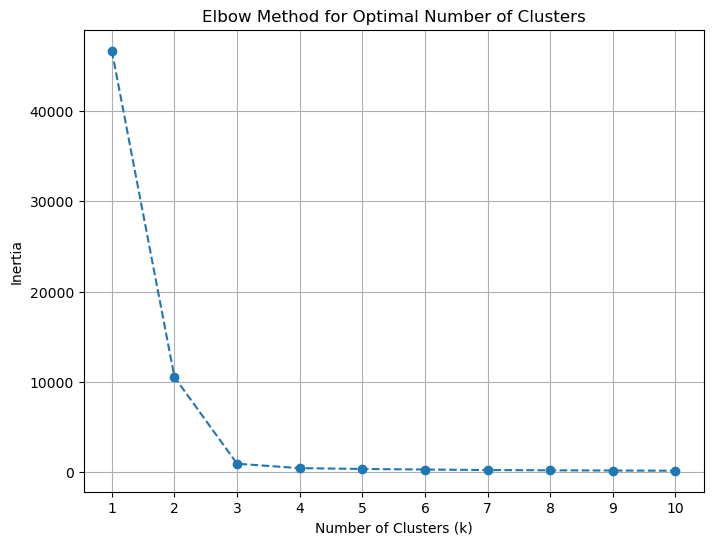

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Feature selection
X = df[['decimalLatitude', 'decimalLongitude']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

/Users/shreyashtiwari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


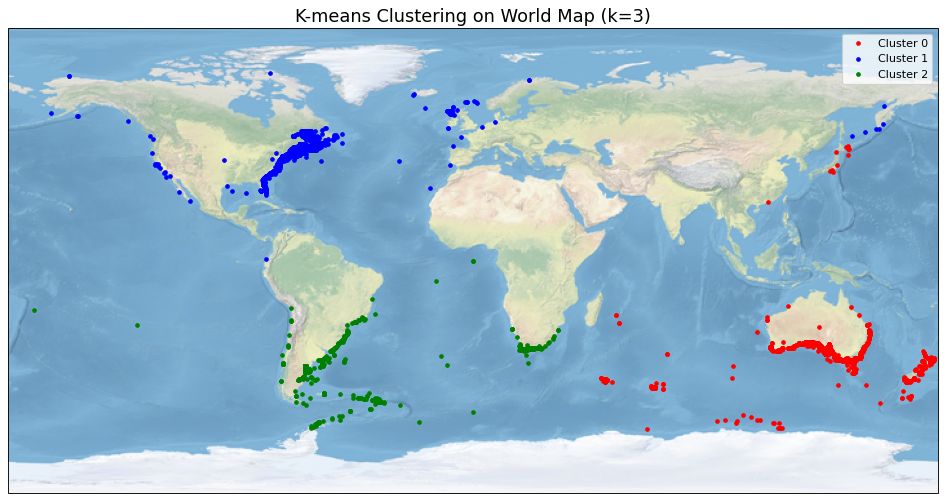

In [42]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection
X = df[['decimalLatitude', 'decimalLongitude']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters on a map using Cartopy
fig, ax = plt.subplots(figsize=(15, 10), dpi=80, subplot_kw={'projection': ccrs.PlateCarree()})

# Add a world map background
ax.stock_img()
ax.set_global()

# Plot clusters
colors = ['red', 'blue', 'green']  # Colors for each cluster
for cluster in range(3):
    cluster_points = df[df['cluster'] == cluster]
    ax.scatter(cluster_points['decimalLongitude'], cluster_points['decimalLatitude'], 
               color=colors[cluster], label=f'Cluster {cluster}', transform=ccrs.PlateCarree(), s=10)

plt.title('K-means Clustering on World Map (k=3)', fontsize=16)
plt.legend()
plt.show()
